# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives
At the end of the experiment, participants will be able to : 
* understand & implement standard scalar transformation 
* understand & implement polynomical feature transformation
* understand & perform regression

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


### Few tranformation Steps frequently used in Machine Learning 
* **Standard Scalar**
* **Polynomial Feature Transformation**
####  **StandardScalar**: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [ ]:
## Importing data
!wget https://cdn.extras.talentsprint.com/IOT/Data/data2.txt

--2022-03-26 08:45:51--  https://cdn.extras.talentsprint.com/IOT/Data/data2.txt
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘data2.txt.1’

data2.txt.1         100%[===================>]     657  --.-KB/s    in 0s      

2022-03-26 08:45:54 (48.2 MB/s) - ‘data2.txt.1’ saved [657/657]



In [ ]:
data=pd.read_csv('data2.txt',header=None,names=['size of flat','No.of bedrooms','price'])
print(data.head())
X1=data.iloc[:,[0,1]]
Y1=data.iloc[:,[2]]      

   size of flat  No.of bedrooms   price
0          2104               3  399900
1          1600               3  329900
2          2400               3  369000
3          1416               2  232000
4          3000               4  539900


##### Manually doing StandardScalar operation

In [ ]:
## Splitting the dataset into train & test
X_train, X_test, Y_train, Y_test = train_test_split( X1,Y1,test_size=0.05, random_state=42) 

In [ ]:
X_train_scale=(X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0) #Normalizatin & Feature scaling
## Storing mean and standard deviation of train for using while transforming test data
mean=np.mean(X_train,axis=0)
print('mean: ',mean,'\n')
std=np.std(X_train,axis=0)
print('std_dev: ',std,'\n')
X_train_scale

mean:  size of flat      1997.409091
No.of bedrooms       3.159091
dtype: float64 

std_dev:  size of flat      804.171322
No.of bedrooms      0.767024
dtype: float64 



,size of flat,No.of bedrooms
43,-0.991591,-0.207413
24,2.353467,-0.207413
36,-0.943094,-0.207413
12,-0.133565,-0.207413
19,1.285287,1.096326
4,1.246738,1.096326
25,-1.115943,-0.207413
8,-0.767758,-0.207413
3,-0.722992,-1.511153
6,-0.576257,-0.207413


In [ ]:
## Transforming test data
X_test_scale=(X_test-mean)/std
X_test_scale

,size of flat,No.of bedrooms
27,0.657311,-0.207413
39,0.204671,1.096326
26,-0.670764,-0.207413


##### Using library for StandardScalar operation

In [ ]:
## Fitting the data--> In this step it will store the mean and standard deviation of each features
scaler = StandardScaler()
scaler.fit(X_train)
print('mean: ',scaler.mean_,'\n') # Gives the mean
print('std_dev: ',scaler.scale_,'\n') # Gives standard deviation
## Transforming step--> In this step now data sets will be transformed using above calculated mean and standard deviation z = (x - u) / s
# transformation of train data
X_train_scaled=scaler.transform(X_train)
print(X_train_scaled,'\n')
#transformation of test data
X_test_scaled=scaler.transform(X_test)
X_test_scaled

mean:  [1997.40909091    3.15909091] 

std_dev:  [8.04171322e+02 7.67024410e-01] 

[[-0.99159106 -0.2074131 ]
 [ 2.3534673  -0.2074131 ]
 [-0.94309393 -0.2074131 ]
 [-0.13356494 -0.2074131 ]
 [ 1.28528695  1.09632637]
 [ 1.24673796  1.09632637]
 [-1.11594267 -0.2074131 ]
 [-0.76775816 -0.2074131 ]
 [-0.72299158 -1.51115257]
 [-0.57625667 -0.2074131 ]
 [-0.41459958 -1.51115257]
 [ 1.41709966 -0.2074131 ]
 [ 3.08465478  2.40006585]
 [-0.94682448 -0.2074131 ]
 [-1.42433467 -1.51115257]
 [ 0.37627667  1.09632637]
 [-0.62599732 -0.2074131 ]
 [-0.84236912 -1.51115257]
 [ 0.7953416  -0.2074131 ]
 [ 0.05296248  1.09632637]
 [-0.18081855  1.09632637]
 [ 0.13254751 -0.2074131 ]
 [-1.24029428 -2.81489204]
 [-0.19698426 -1.51115257]
 [-0.0154309   1.09632637]
 [ 0.00322184 -0.2074131 ]
 [-0.23180271  1.09632637]
 [-0.49418461 -0.2074131 ]
 [ 0.29917867 -0.2074131 ]
 [-0.13605197 -1.51115257]
 [ 0.50062828 -0.2074131 ]
 [-0.69687774 -0.2074131 ]
 [-0.04403178  1.09632637]
 [ 0.16736596  1.09632637]

array([[ 0.65731132, -0.2074131 ],
       [ 0.20467145,  1.09632637],
       [-0.6707639 , -0.2074131 ]])

![](https://cdn.extras.talentsprint.com/IOT/Images/GD_for_Multivaribale_Regression.png)

#### Applying Gradient Descent For Multivariable Regression

In [ ]:
m,n=X_train_scaled.shape
X=np.hstack([np.ones((m,1)),X_train_scaled])
Y=Y_train
theta=np.random.randn(n+1,1)
n_iterations=2000
cost=np.zeros(n_iterations)
alpha=0.01
for iteration in range(n_iterations):
    grad=(1/m)*X.T.dot((X.dot(theta)-Y))
    theta=theta-alpha*grad
    cost[iteration]=(1/(2*m))*np.sum(np.square((X.dot(theta)-Y)))
theta

array([[335883.97664672],
       [113247.11550866],
       [ -4537.89755682]])

#### Visualisation of cost 

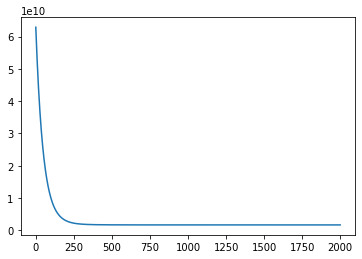

In [ ]:
plt.plot(cost)

### Predicting for all X_tain_scaled data

In [ ]:
m,n=X_train_scaled.shape
X=np.hstack([np.ones((m,1)),X_train_scaled])
Yp=X.dot(theta)
Yp

### Predicting for test data i.e., X_test_scaled

In [ ]:
m1,n1=X_test_scaled.shape
X1=np.hstack([np.ones((m1,1)),X_test_scaled])
Yp1=X1.dot(theta)
Yp1

In [ ]:
Y_test

### Measuring Accuracy

In [ ]:
# Calculation of RMSE is shown below:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(Y_train, Yp))
print('Root Mean Squared Error = ',RMSE)

Root Mean Squared Error =  57207.54650100726


#### Visualizing predicted and original price (for train data)

In [ ]:
X_axis=np.arange(1,m+1)
plt.plot(X_axis,Y_train,'k-') # orginal
plt.plot(X_axis,Yp,'r-') # Predicted
plt.show()

#### Polynomial Regression

In [ ]:
!wget https://cdn.extras.talentsprint.com/IOT/Data/poly.xlsx

In [ ]:
data=pd.read_excel('poly.xlsx')
print(data.head())
XX=data.iloc[:,1].values
YY=data.iloc[:,2].values  

In [ ]:
plt.scatter(XX,YY) # original
plt.show()

####  **Polynomial features** : [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
X = np.arange(6).reshape(3, 2)
print('Initial Features : \n',X,'\n')
poly = PolynomialFeatures(2)
print('New features after polynomial transformation : \n', poly.fit_transform(X),'\n')
poly = PolynomialFeatures(interaction_only=True)
print('Excluding features with power of 2 : \n', poly.fit_transform(X))

##### Applying on dataset

In [ ]:
m= len(XX)
X1=XX[:,np.newaxis]
poly = PolynomialFeatures(2)
X1=poly.fit_transform(X1)

In [ ]:
X1

#### Applying Gradient Descent

In [ ]:
m,n=X1.shape
X=X1
Y=YY[:,np.newaxis]
theta=np.random.randn(n,1)
n_iterations=10000
cost=np.zeros(n_iterations)
alpha=0.001
for iteration in range(n_iterations):
    grad=(1/m)*X.T.dot((X.dot(theta)-Y))
    theta=theta-alpha*grad
    cost[iteration]=(1/(2*m))*np.sum(np.square((X.dot(theta)-Y)))
#theta

In [ ]:
theta

#### Prediciton 

In [ ]:
## Before prediction initial features must be transfromed using the same poly. transformation as above
## to match with input feature for training
m= len(XX)
X1=XX[:,np.newaxis]
poly = PolynomialFeatures(2)
X1=poly.fit_transform(X1)
Yp=X1.dot(theta)
Yp

### Plotting

In [ ]:
X_axis=np.arange(1,m+1)
plt.scatter(X_axis,YY) # orginal
plt.plot(X_axis,Yp,'ro') # Predicted
plt.show()

### Using sklearn library for above polynomial regression

#### Importing data and plotting

In [ ]:
data=pd.read_excel('poly.xlsx')
print(data.head())
XX=data.iloc[:,1].values
YY=data.iloc[:,2].values  
plt.scatter(XX,YY) # original
plt.show()

#### Feature transformation

In [ ]:
m= len(XX)
#X1=np.hstack([np.ones((m,1)),XX[:,np.newaxis]])
X1=XX[:,np.newaxis]
poly = PolynomialFeatures(2)
X1=poly.fit_transform(X1)
X1

##### Training

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X1, YY)

#### Displaying coefficiet and intercept of the aproximated model

In [ ]:
reg.coef_ 

In [ ]:
reg.intercept_ 

#### Prediction

In [ ]:
## Before prediction initial features must be transfromed using the same poly. transformation as above
## to match with input feature for training
m= len(XX)
X1=XX[:,np.newaxis]
X1=poly.fit_transform(X1)
Yp=reg.predict(X1)
Yp

#### Plotting

In [ ]:
X_axis=np.arange(1,m+1)
plt.scatter(X_axis,YY) # orginal
plt.plot(X_axis,Yp,'ro') # Predicted
plt.show()